In [1]:
# Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
hotel_df = pd.read_csv('Hotel Reservations.csv')
hotel_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
#Check for missing values
hotel_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [4]:
#Check for duplicated values
hotel_df.duplicated().sum()

0

In [5]:
#Chek for dimension of dataset
hotel_df.shape

(36275, 19)

In [6]:
#Check detail of data
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#Delete Booking_ID column because there is no effect to the model
hotel_df = hotel_df.drop(columns='Booking_ID')
hotel_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [8]:
#define object column type
obj_col = []
for i in hotel_df.columns:
    if hotel_df[i].dtype == 'O':
        obj_col.append(i)
obj_col

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

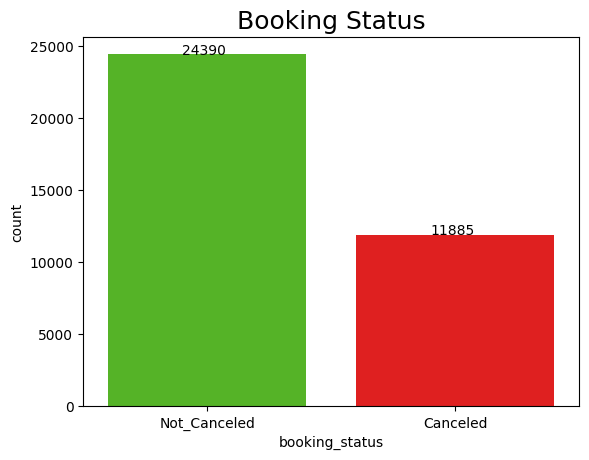

In [9]:
ax = sns.countplot(x = hotel_df['booking_status'],palette=sns.color_palette(["#4DCB0F","#FF0000"]))
plt.title("Booking Status",color="black",fontsize=18)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

Text(0.5, 1.0, 'Cancelation Situation By Months in 2017')

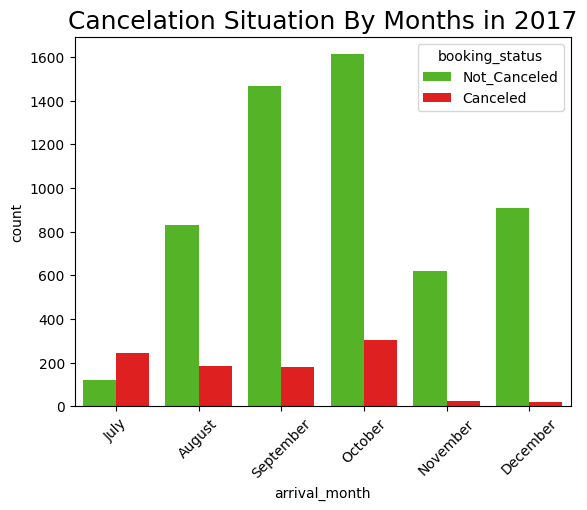

In [10]:
# 2017
sns.countplot(x= hotel_df.loc[hotel_df['arrival_year'] == 2017]['arrival_month'],hue=hotel_df.booking_status,palette=sns.color_palette(["#4DCB0F","#FF0000"]))
plt.xticks(np.arange(0,6),["July","August","September","October","November","December"],rotation=45)
plt.title("Cancelation Situation By Months in 2017",color="black",fontsize=18)

Text(0.5, 1.0, 'Cancelation Situation By Months in 2018')

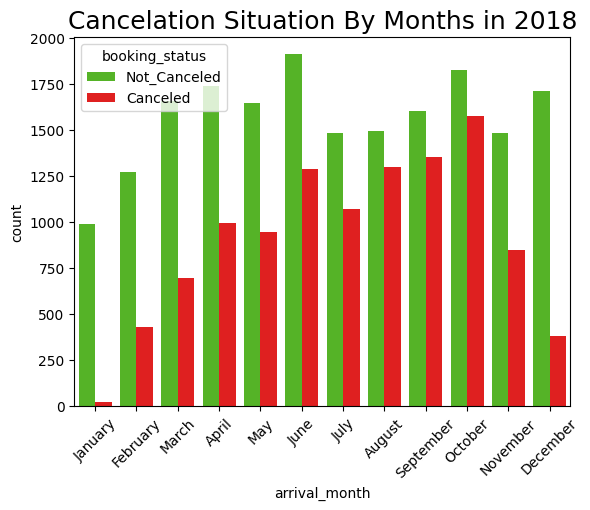

In [11]:
# 2018
sns.countplot(x= hotel_df.loc[hotel_df['arrival_year'] == 2018]['arrival_month'],hue=hotel_df.booking_status,palette=sns.color_palette(["#4DCB0F","#FF0000"]))
plt.xticks(np.arange(0,12),["January","February","March","April","May","June","July","August","September","October","November","December"],rotation=45)
plt.title("Cancelation Situation By Months in 2018",color="black",fontsize=18)

Text(0.5, 1.0, 'Cancelation Situation By Months')

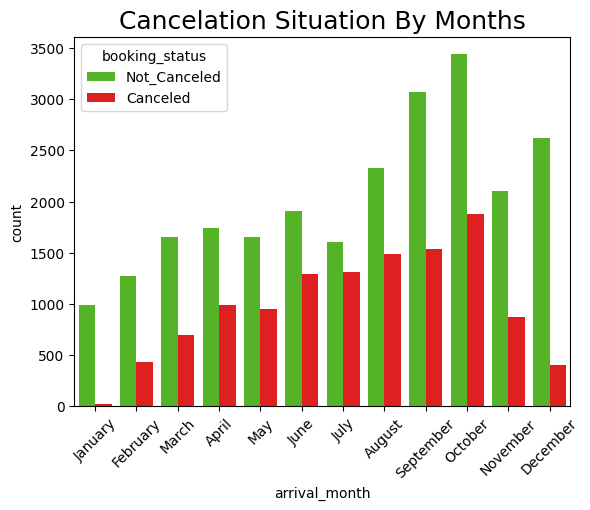

In [12]:
sns.countplot(x= hotel_df['arrival_month'],hue=hotel_df.booking_status,palette=sns.color_palette(["#4DCB0F","#FF0000"]))
plt.xticks(np.arange(0,12),["January","February","March","April","May","June","July","August","September","October","November","December"],rotation=45)
plt.title("Cancelation Situation By Months",color="black",fontsize=18)

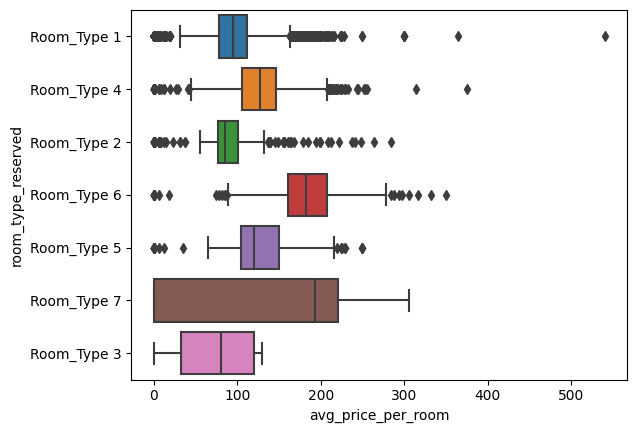

In [13]:
ax = sns.boxplot(x="avg_price_per_room", y="room_type_reserved",
                 data=hotel_df)

In [14]:
hotel_df.loc[hotel_df['room_type_reserved'] == 'Room_Type 1']['avg_price_per_room'].describe()

count    28130.000000
mean        95.918532
std         28.003094
min          0.000000
25%         78.300000
50%         94.500000
75%        112.200000
max        540.000000
Name: avg_price_per_room, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

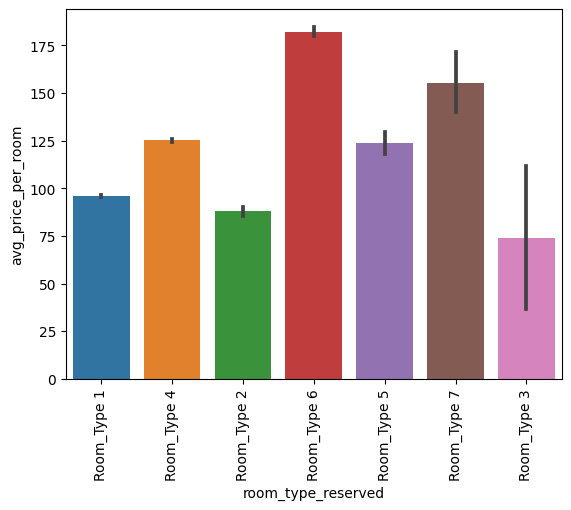

In [15]:
ax = sns.barplot(x= hotel_df.room_type_reserved,y= hotel_df.avg_price_per_room)
plt.xticks(rotation = 90)

In [16]:
hotel_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [26]:
hotel_df.loc[(hotel_df['booking_status'] == 'Not_Canceled'), 'STATUS'] = 0
hotel_df.loc[(hotel_df['booking_status'] == 'Canceled'), 'STATUS'] = 1
hotel_df[['booking_status','STATUS']]

,booking_status,STATUS
0,Not_Canceled,0.0
1,Not_Canceled,0.0
2,Canceled,1.0
3,Canceled,1.0
4,Canceled,1.0
...,...,...
36270,Not_Canceled,0.0
36271,Canceled,1.0
36272,Not_Canceled,0.0
36273,Canceled,1.0


In [28]:
hotel_df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [32]:
hotel_df.loc[(hotel_df['type_of_meal_plan'] == 'Not Selected'), 'MEAL'] = 0
hotel_df.loc[(hotel_df['type_of_meal_plan'] == 'Meal Plan 1'), 'MEAL'] = 1
hotel_df.loc[(hotel_df['type_of_meal_plan'] == 'Meal Plan 2'), 'MEAL'] = 2
hotel_df.loc[(hotel_df['type_of_meal_plan'] == 'Meal Plan 3'), 'MEAL'] = 3
hotel_df[['type_of_meal_plan','MEAL']]

,type_of_meal_plan,MEAL
0,Meal Plan 1,1.0
1,Not Selected,0.0
2,Meal Plan 1,1.0
3,Meal Plan 1,1.0
4,Not Selected,0.0
...,...,...
36270,Meal Plan 1,1.0
36271,Meal Plan 1,1.0
36272,Meal Plan 1,1.0
36273,Not Selected,0.0


In [33]:
hotel_df.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

hotel_df['ROOM_TYPE'] = le.fit_transform(hotel_df['room_type_reserved'])

In [37]:
hotel_df[['room_type_reserved','ROOM_TYPE']].value_counts()

room_type_reserved  ROOM_TYPE
Room_Type 1         0            28130
Room_Type 4         3             6057
Room_Type 6         5              966
Room_Type 2         1              692
Room_Type 5         4              265
Room_Type 7         6              158
Room_Type 3         2                7
dtype: int64

In [38]:
hotel_df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [39]:
hotel_df['SEGMENT_TYPE'] = le.fit_transform(hotel_df['market_segment_type'])
hotel_df[['market_segment_type','SEGMENT_TYPE']].value_counts()

market_segment_type  SEGMENT_TYPE
Online               4               23214
Offline              3               10528
Corporate            2                2017
Complementary        1                 391
Aviation             0                 125
dtype: int64

In [41]:
data = hotel_df.drop(columns=['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status'])
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'STATUS', 'MEAL',
       'ROOM_TYPE', 'SEGMENT_TYPE'],
      dtype='object')

In [42]:
data = data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'required_car_parking_space', 'lead_time','arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'MEAL', 'ROOM_TYPE', 'SEGMENT_TYPE', 'STATUS']]
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,MEAL,ROOM_TYPE,SEGMENT_TYPE,STATUS
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,1.0,0,3,0.0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0.0,0,4,0.0
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,1.0,0,4,1.0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1.0,0,4,1.0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,0.0,0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,0,0,167.80,1,1.0,3,4,0.0
36271,2,0,1,3,0,228,2018,10,17,0,0,0,90.95,2,1.0,0,4,1.0
36272,2,0,2,6,0,148,2018,7,1,0,0,0,98.39,2,1.0,0,4,0.0
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94.50,0,0.0,0,4,1.0


In [72]:
feature = data.columns.tolist()
feature_to_remove = ['lead_time','arrival_year','arrival_month','arrival_date','avg_price_per_room']
for val in feature_to_remove:
    while val in feature:
        feature.remove(val)
feature

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests',
 'MEAL',
 'ROOM_TYPE',
 'SEGMENT_TYPE',
 'STATUS']

In [78]:
from scipy.stats import chi2_contingency

# Check the correlation between two category variable which are the feature ans STATUS 
for i in feature[0:-1]:
    # State the Hypothesis between category and STATUS
    # H0 : The variables are independent
    # H1 : The variables are dependent

    contingency_table = pd.crosstab(data[i], data['STATUS'])

    stat, p, dot, expected = chi2_contingency(contingency_table)

    #print("Test statistic:", stat)
    #print("p-value:", p)

    s = 0

    alpha = 0.05
    if p > alpha:
        print("The "+ i +" and STATUS are independent (fail to reject H0)")
        print(i + ' vs STATUS')
        s+=1
    #else:
        #print("The "+ i +" and STATUS are dependent (reject H0)")
if s == 0:
    print('All of the features are dependent with STATUS')

All of the features are dependent with STATUS


In [74]:
from scipy.stats import pointbiserialr

for i in feature_to_remove:
    print(i + ' and STATUS')
    corr, p = pointbiserialr(data[i],data['STATUS'])

    print("Correlation coefficient:", corr)
    print("p-value:", p)

lead_time and STATUS
Correlation coefficient: 0.4385379185883408
p-value: 0.0
arrival_year and STATUS
Correlation coefficient: 0.17952889420411344
p-value: 2.085779062705185e-260
arrival_month and STATUS
Correlation coefficient: -0.011233054158995934
p-value: 0.03239997582841227
arrival_date and STATUS
Correlation coefficient: 0.010629047132925637
p-value: 0.04292948340795142
avg_price_per_room and STATUS
Correlation coefficient: 0.14256933929269888
p-value: 5.230318924515903e-164


<AxesSubplot: >

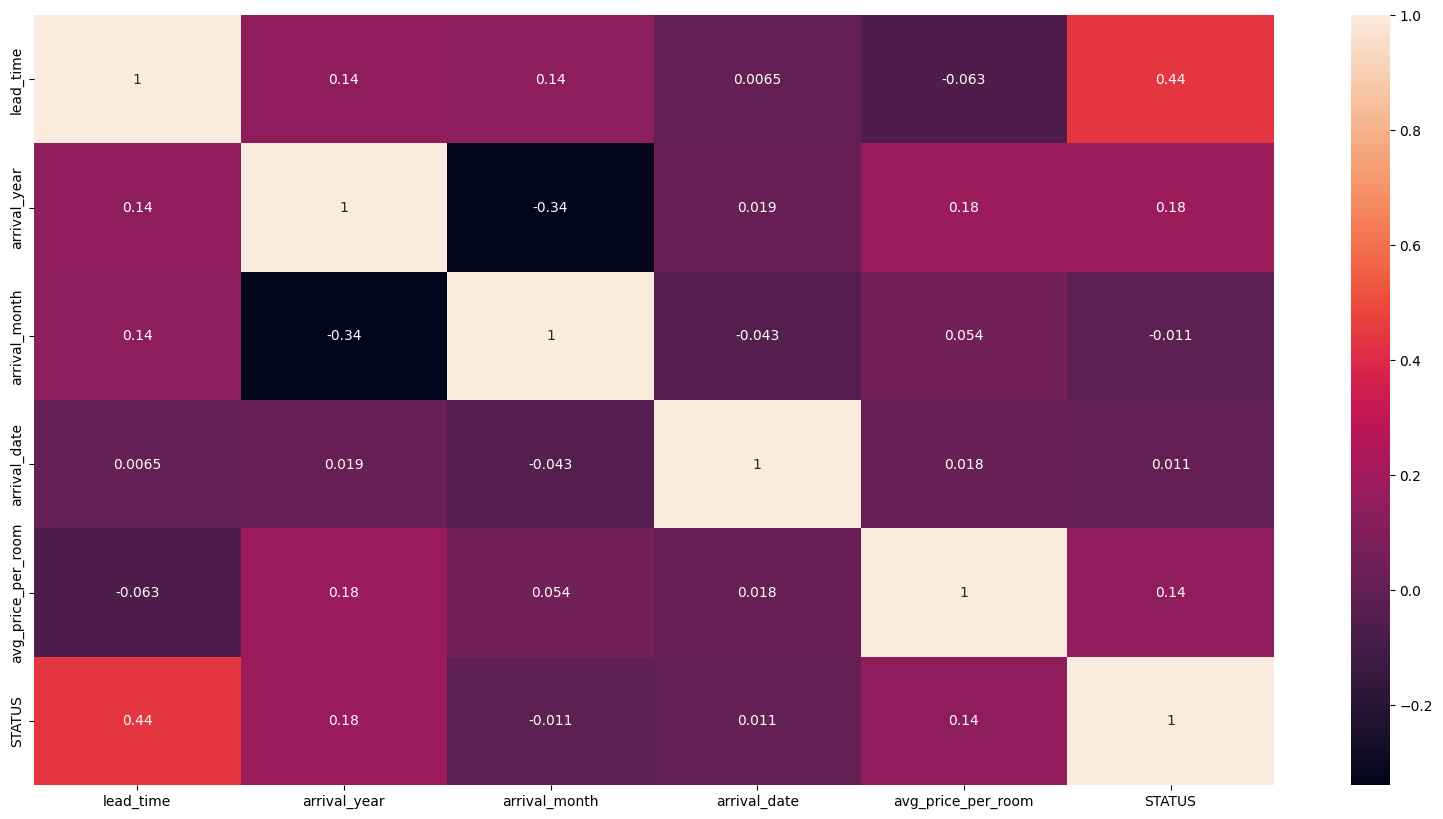

In [75]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data=data[['lead_time','arrival_year','arrival_month','arrival_date','avg_price_per_room','STATUS']].corr(), annot=True, ax =ax)

In [80]:
print("This is a string with\na line break.", end='')
print('OAK')

This is a string with
a line break.OAK
